# EEG Complexity Analysis

This example can be referenced by [citing the package](https://github.com/neuropsychology/NeuroKit#citation).

**This example is not ready. We need your help to help us create an example on how to do complexity analysis EEG data!**

Actually, this example is exploratory and tries to apply an exploratory index (fractal density) to EEG data. Do not take it seriously!

In [118]:
# Load packages
import numpy as np
import pandas as pd
import mne
import matplotlib.pyplot as plt
import neurokit2 as nk

In [119]:
# This "decorative" cell should be hidden from the docs once this is implemented:
# https://github.com/microsoft/vscode-jupyter/issues/1182 
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images
plt.rcParams['font.size']= 14

## Introduction

Load and format the EEG data of one participant. Following [this MNE example](https://mne.tools/dev/auto_tutorials/evoked/30_eeg_erp.html), we'll load the events from an external events file, and weell crop the raw data from ~4.5 minutes down to 90 seconds to speed up computations.


In [120]:
# Load raw EEG data
raw = raw = mne.io.read_raw_fif(mne.datasets.sample.data_path() / 'MEG/sample/sample_audvis_filt-0-40_raw.fif', preload=True, verbose=False)
raw.pick(['eeg', 'eog'], verbose=False)

# Load events
events = mne.read_events(mne.datasets.sample.data_path() / 'MEG/sample/sample_audvis_filt-0-40_raw-eve.fif')

# Discard events >90 seconds (not strictly necessary, but avoids some warnings)
raw.crop(tmax=90)  # in seconds (happens in-place)
events = events[events[:, 0] <= raw.last_samp]

# Event condition mapping
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'face': 5, 'buttonpress': 32}

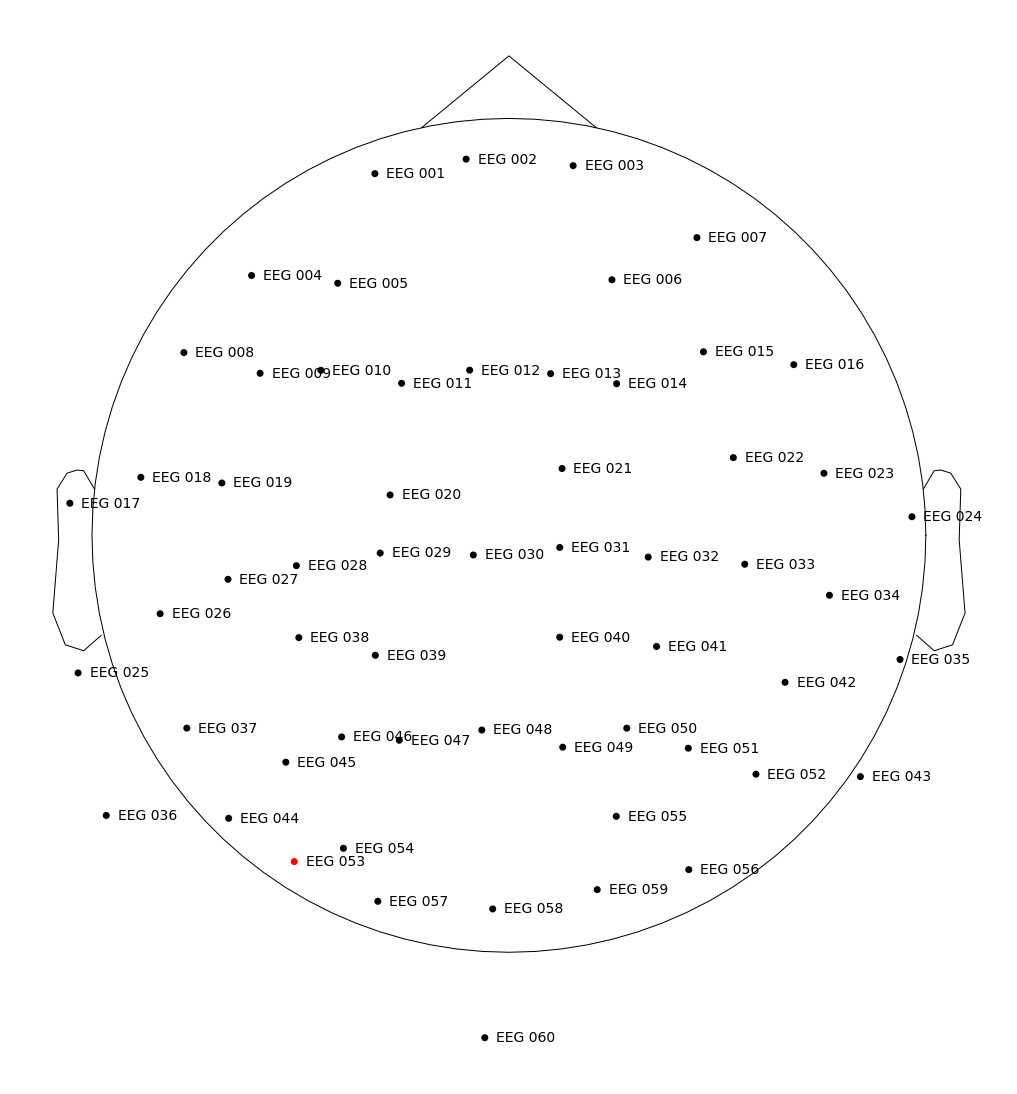

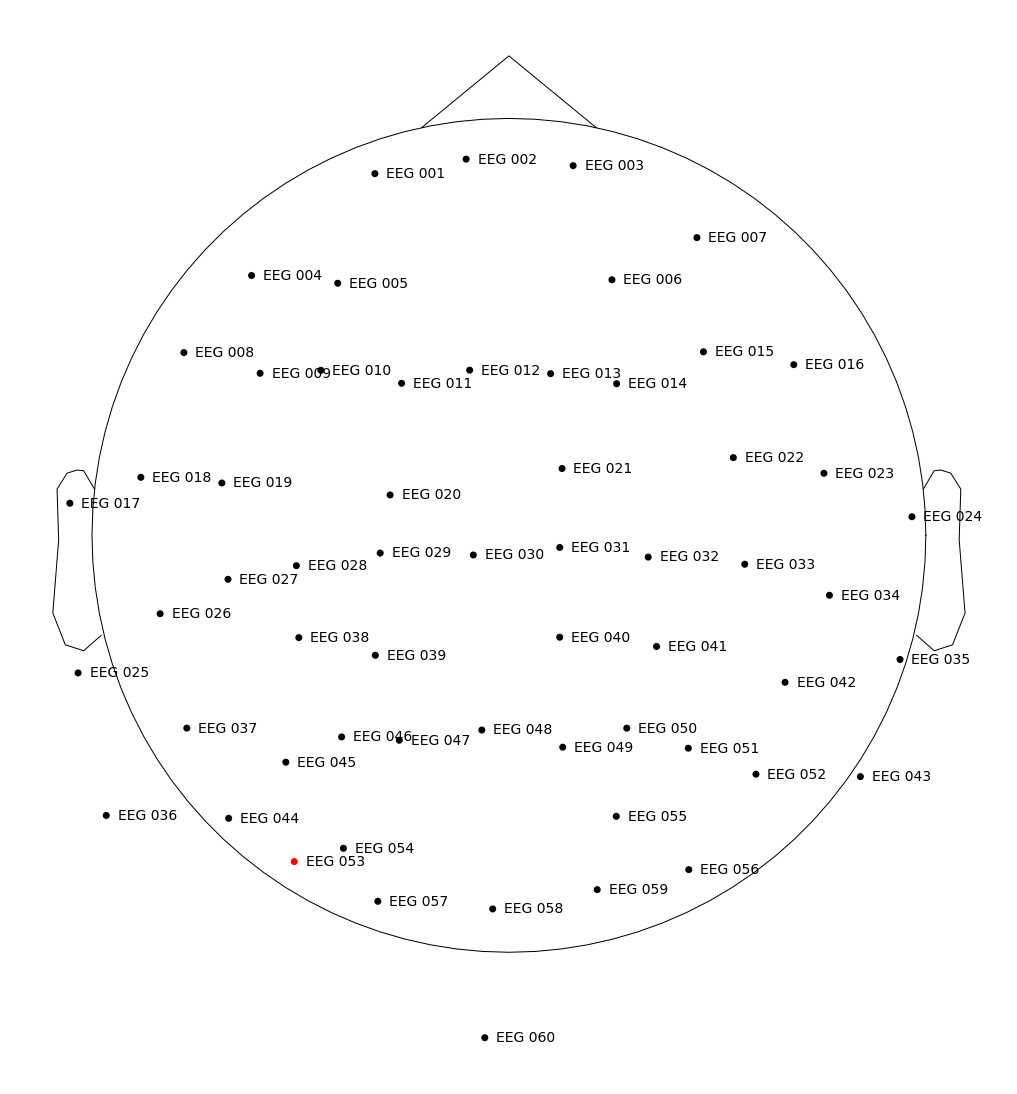

In [121]:
raw = raw.filter(l_freq=0.1, h_freq=40,verbose=False)
raw.plot_sensors(show_names=True)

In [122]:
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.3, tmax=0.7, preload=True, verbose=False)

# Reject epochs by providing maximum peak-to-peak signal value thresholds
epochs = epochs.drop_bad(reject= dict(eeg=100e-6, eog=200e-6), verbose=False)  # 100 µV, 200 µV

In [123]:
epochs

Number of events,114
Events,auditory/left: 25auditory/right: 27buttonpress: 4face: 5visual/left: 28visual/right: 25
Time range,-0.300 – 0.699 sec
Baseline,-0.300 – 0.000 sec


Projections have already been applied. Setting proj attribute to True.


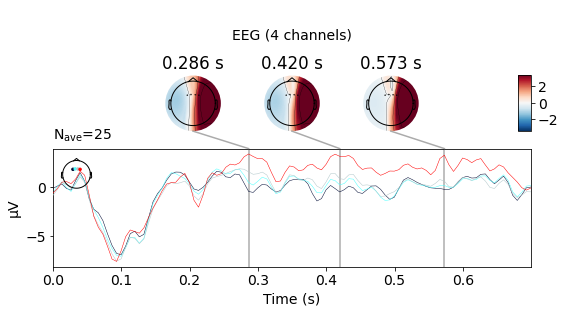

Projections have already been applied. Setting proj attribute to True.


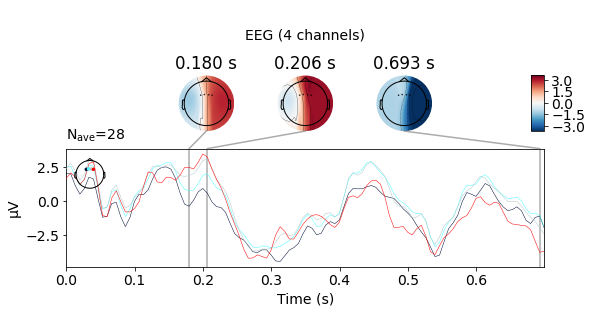

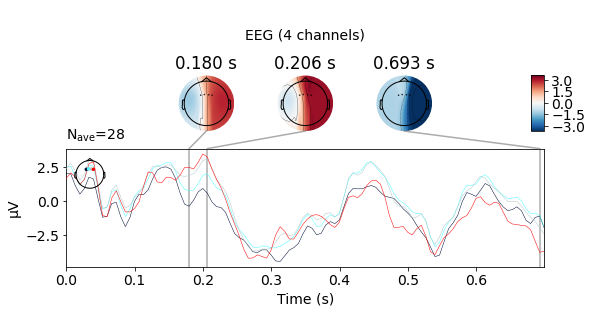

In [124]:
# Channels of interest
channels = ["EEG 0" + str(i) for i in range(11, 15)]

auditory = epochs['auditory/left'].pick_channels(channels).crop(tmin=0)
visual = epochs['visual/left'].pick_channels(channels).crop(tmin=0)

auditory.average().plot_joint()
visual.average().plot_joint()

DFD1 = 0.8011477244517542, DFD2 = 0.8601582801123311


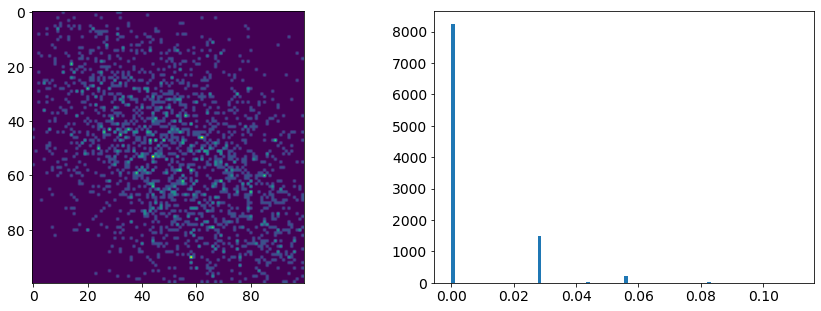

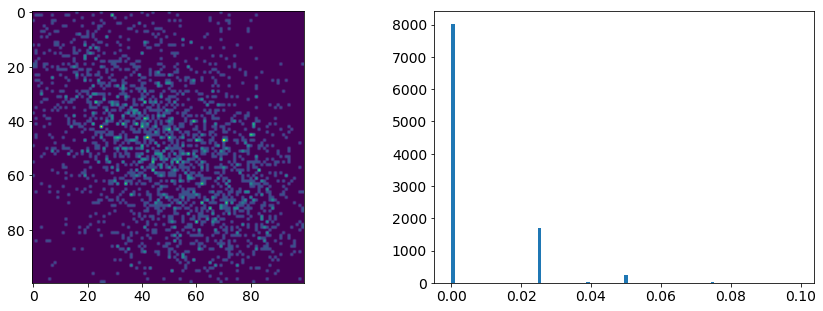

In [151]:
epochs_auditory = {str(i + 1): pd.DataFrame({"Signal": epoch.mean(axis=0)}) for i, epoch in enumerate(auditory)}
epochs_visual = {str(i + 1): pd.DataFrame({"Signal": epoch.mean(axis=0)}) for i, epoch in enumerate(visual)}

delay = 27 / (1000 / 150.15)  # delay in milliseconds

dfd1, _ = nk.fractal_density(epochs_auditory, delay=int(delay), show=True)
dfd2, _ = nk.fractal_density(epochs_visual, delay=int(delay), show=True)

print(f"DFD1 = {dfd1}, DFD2 = {dfd2}")